<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-To/blob/main/Jupyter%20Notebook%20Scripts/Selection_Rules_Plotted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

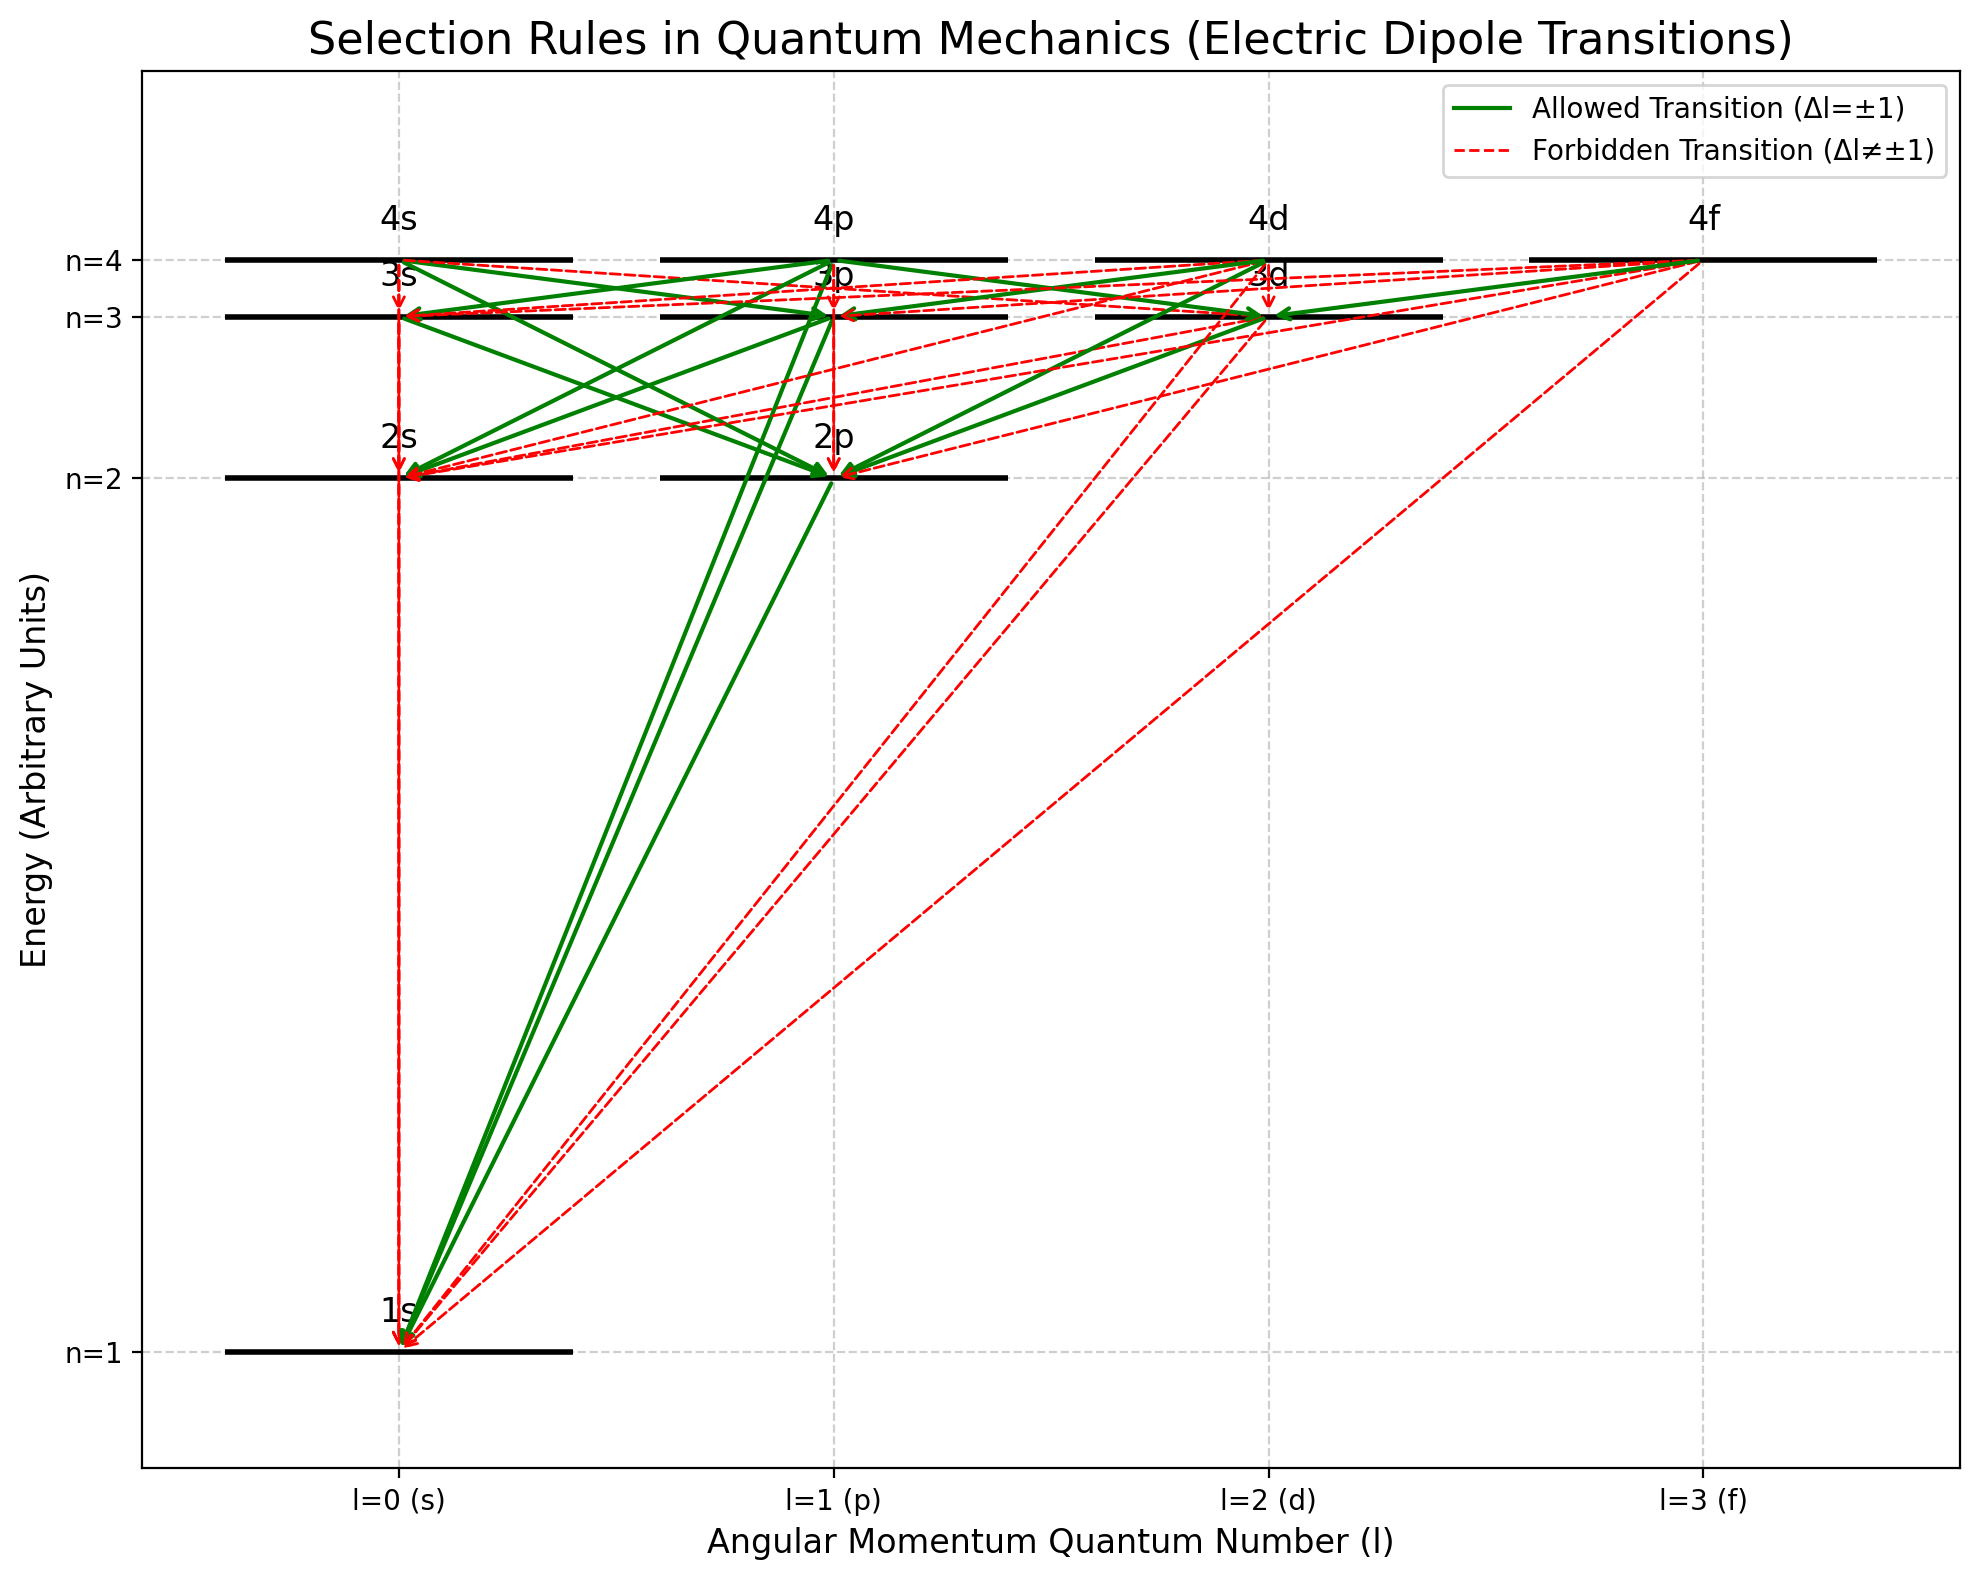

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_dpi(200)

# Define the energy levels for n = 1 to 4
# Using a simple model E_n = -1/n^2
energy_levels = {n: -1/n**2 for n in range(1, 5)}

# Define the l values for each n and their corresponding labels
states = {}
for n in range(1, 5):
    for l in range(n):
        states[(n, l)] = energy_levels[n]

# Plot horizontal lines for each (n, l) state
for (n, l), energy in states.items():
    ax.hlines(energy, l - 0.4, l + 0.4, color='black', lw=2)
    label = f"{n}{['s', 'p', 'd', 'f'][l]}"
    ax.text(l, energy + 0.02, label, ha='center', va='bottom', fontsize=12)

# Draw arrows for transitions
for (n1, l1), E1 in states.items():
    for (n2, l2), E2 in states.items():
        if n1 > n2: # Only show transitions to lower energy levels (emission)
            delta_l = abs(l1 - l2)
            if delta_l == 1:
                # Allowed transition (solid green arrow)
                ax.annotate("", xy=(l2, E2), xytext=(l1, E1),
                            arrowprops=dict(arrowstyle="->", color="green", lw=1.5))
            else:
                # Forbidden transition (dashed red arrow)
                ax.annotate("", xy=(l2, E2), xytext=(l1, E1),
                            arrowprops=dict(arrowstyle="->", color="red", linestyle="--", lw=1))


# Customize the plot
ax.set_title("Selection Rules in Quantum Mechanics (Electric Dipole Transitions)", fontsize=16)
ax.set_xlabel("Angular Momentum Quantum Number (l)", fontsize=12)
ax.set_ylabel("Energy (Arbitrary Units)", fontsize=12)
ax.set_xticks(range(4))
ax.set_xticklabels(['l=0 (s)', 'l=1 (p)', 'l=2 (d)', 'l=3 (f)'])
ax.set_yticks(list(energy_levels.values()))
ax.set_yticklabels([f"n={n}" for n in energy_levels.keys()])
ax.set_ylim(-1.1, 0.1)
ax.grid(True, linestyle='--', alpha=0.6)


# Create a legend
legend_elements = [Line2D([0], [0], color='green', lw=1.5, label='Allowed Transition (Δl=±1)'),
                   Line2D([0], [0], color='red', lw=1, linestyle='--', label='Forbidden Transition (Δl≠±1)')]
ax.legend(handles=legend_elements, loc='best')

# Display and save the figure
plt.tight_layout()
plt.savefig("selection_rules_plot.png")
plt.show()

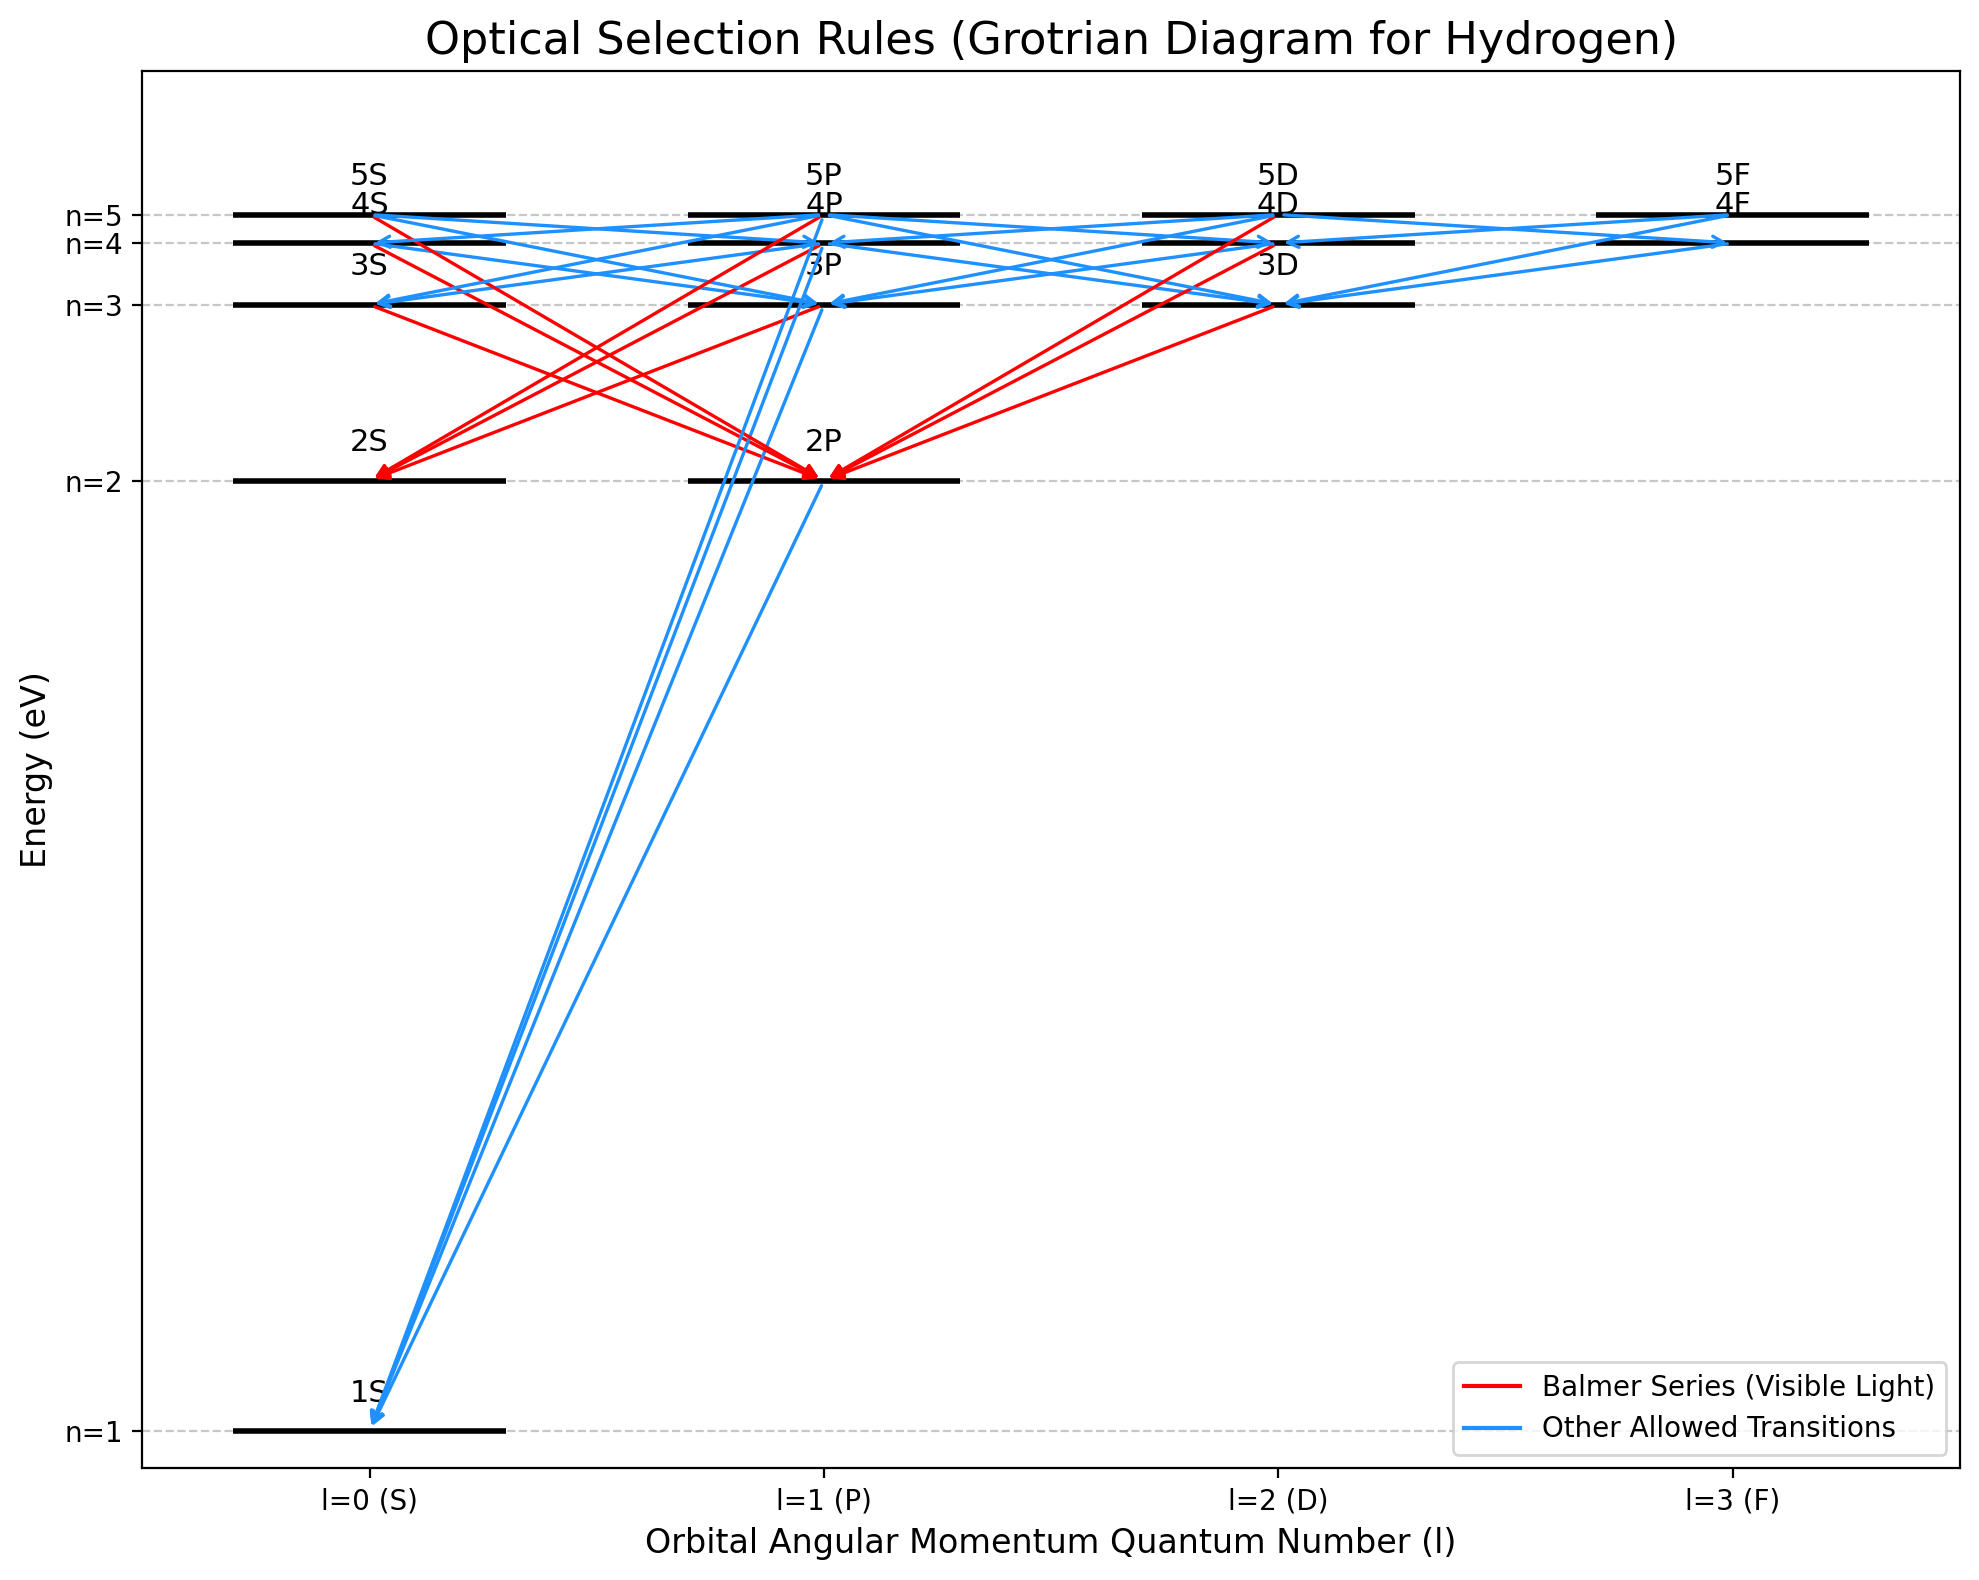

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_dpi(200)

# Define the energy levels for Hydrogen in eV
# E_n = -13.6 / n^2
energy_levels = {n: -13.6 / n**2 for n in range(1, 6)}

# Define the states (n, l)
states = []
for n in range(1, 6):
    for l in range(n):
        if l < 4:  # Limit to S, P, D, F orbitals for clarity
            states.append({'n': n, 'l': l, 'E': energy_levels[n]})

# Plot horizontal lines for each state
for state in states:
    l, E = state['l'], state['E']
    ax.hlines(E, l - 0.3, l + 0.3, color='black', lw=2)
    label = f"{state['n']}{['S', 'P', 'D', 'F'][l]}"
    ax.text(l, E + 0.25, label, ha='center', va='bottom', fontsize=11)

# Draw arrows for ALLOWED transitions (Δl = ±1)
for start_state in states:
    for end_state in states:
        # Consider only emission (start_n > end_n)
        if start_state['n'] > end_state['n']:
            delta_l = abs(start_state['l'] - end_state['l'])

            # Check the selection rule
            if delta_l == 1:
                # Highlight the Balmer Series (transitions ending at n=2)
                line_color = 'red' if end_state['n'] == 2 else 'dodgerblue'

                ax.annotate("",
                            xy=(end_state['l'], end_state['E']),
                            xytext=(start_state['l'], start_state['E']),
                            arrowprops=dict(arrowstyle="->", color=line_color, lw=1.2))

# --- Customize the plot ---
ax.set_title("Optical Selection Rules (Grotrian Diagram for Hydrogen)", fontsize=16)
ax.set_xlabel("Orbital Angular Momentum Quantum Number (l)", fontsize=12)
ax.set_ylabel("Energy (eV)", fontsize=12)

# Set x-axis for l values
ax.set_xticks(range(4))
ax.set_xticklabels(['l=0 (S)', 'l=1 (P)', 'l=2 (D)', 'l=3 (F)'])

# Set y-axis to show principal quantum numbers
y_ticks = list(energy_levels.values())
y_labels = [f"n={n}" for n in energy_levels.keys()]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-14, 1)
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Create a legend
legend_elements = [Line2D([0], [0], color='red', lw=1.5, label='Balmer Series (Visible Light)'),
                   Line2D([0], [0], color='dodgerblue', lw=1.5, label='Other Allowed Transitions')]
ax.legend(handles=legend_elements, loc='lower right')

# Display and save the figure
plt.tight_layout()
plt.savefig("optical_selection_rules_plot.png")
plt.show()